In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.interpolate
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
from scipy import stats
from trap_util import trap
import time
%matplotlib inline

In [2]:
# physical parameters
q = -1.60217662e-19 # coulombs
m = 9.10938356e-31 #kg (electron)
#m = 6.6359437706294e-26 #(calcium)
kB = 1.38064852e-23 # J/K
f = 100.0e6*270 # Electrode frequency, in Hertz

In [3]:
# loading E field (vector)
data = np.loadtxt("Ion_Trap_Sim/Fusion3D_100MHz_50V_ion_oop_realExEy_smooth.fld", skiprows = 2)

In [4]:
# manipulating E field data
df = pd.DataFrame(data, columns=['x', 'y', 'z', 'Ex', 'Ey', 'Ez'])
x_max, x_min = df.x.max(), df.x.min()
y_max, y_min = df.y.max(), df.y.min()
# print(x_max, x_min, y_max, y_min)
# print(df.y.nunique())
Nx, Ny = df.x.nunique() - 1, df.y.nunique() - 1 # numbers of intervals that divide each dimension
dx, dy = (x_max-x_min)/Nx, (y_max-y_min)/Ny # interval size
print("x_max = ", x_max*1.0e3, "mm")
print("y_max = ", y_max*1.0e3, "mm")
print("x_min = ", x_min*1.0e3, "mm")
print("y_min = ", y_min*1.0e3, "mm")
print("spatial resolution x: ", dx*1.0e6, "um")
print("spatial resolution y: ", dy*1.0e6, "um")

x_max =  0.25 mm
y_max =  0.25 mm
x_min =  -0.25 mm
y_min =  -0.25 mm
spatial resolution x:  0.5 um
spatial resolution y:  0.5 um


## Initializing electron trap object

In [5]:
e_trap = trap(df, x_max, x_min, y_max, y_min, Nx, Ny, dx, dy, f)

## Single Particle Simulation

Text(0, 0.5, 'y (um)')

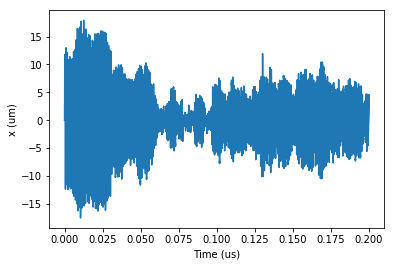

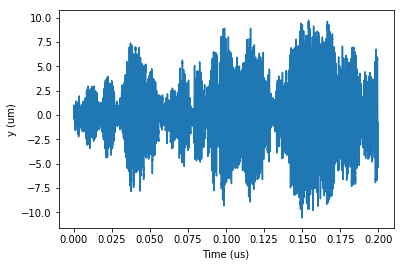

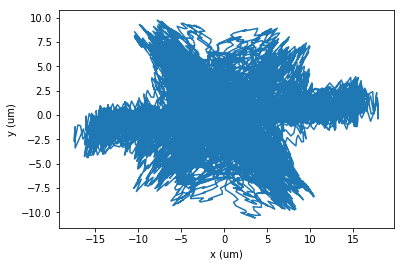

In [22]:
e_trap.m = 9.10938356e-31 #kg (electron)
e_trap.f = 270.0e8

T = 300.0
rou = 0.0e-6
phi = 0.0
v = np.sqrt(2*kB*T/e_trap.m)
theta = 0.0
dt = 1.0e-11
t_max = 20.0e-8
e_result = e_trap.traj(rou, phi, v, theta, dt, t_max)
t_s = np.array(e_result[0])
x_traj = np.array(e_result[1])
y_traj = np.array(e_result[2])

plt.figure()
plt.plot(t_s*1.0e6, x_traj*1.0e6)
plt.xlabel("Time (us)")
plt.ylabel("x (um)")

plt.figure()
plt.plot(t_s*1.0e6, y_traj*1.0e6)
plt.xlabel("Time (us)")
plt.ylabel("y (um)")

plt.figure()
plt.plot(x_traj*1.0e6, y_traj*1.0e6)
plt.xlabel("x (um)")
plt.ylabel("y (um)")

## Ion trap comparison

In [7]:
i_trap = trap(df, x_max, x_min, y_max, y_min, Nx, Ny, dx, dy, f)

Text(0, 0.5, 'y (um)')

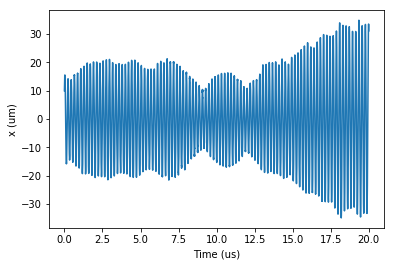

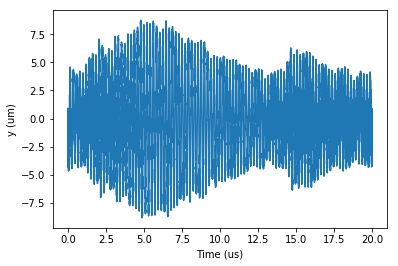

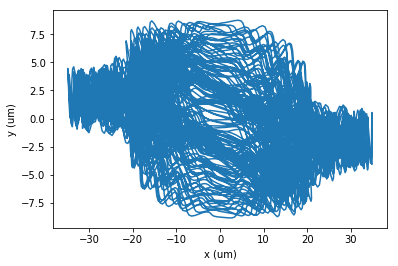

In [21]:
i_trap.f = 100.0e6
i_trap.q = 1.60217662e-19
i_trap.m = 6.6359437706294e-26

T = 300.0
rou = 10.0e-6
phi = 0.0
v = np.sqrt(2*kB*T/i_trap.m)
theta = 0.0
dt = 1.0e-9
t_max = 20.0e-6
i_result = i_trap.traj(rou, phi, v, theta, dt, t_max)

t_s = np.array(i_result[0])
x_traj = np.array(i_result[1])
y_traj = np.array(i_result[2])

plt.figure()
plt.plot(t_s*1.0e6, x_traj*1.0e6)
plt.xlabel("Time (us)")
plt.ylabel("x (um)")

plt.figure()
plt.plot(t_s*1.0e6, y_traj*1.0e6)
plt.xlabel("Time (us)")
plt.ylabel("y (um)")

plt.figure()
plt.plot(x_traj*1.0e6, y_traj*1.0e6)
plt.xlabel("x (um)")
plt.ylabel("y (um)")

## dt dependence

In [23]:
start = time.time()
N_electron_samples = 200
T = 300.0
t_max = 20.0e-8
FWHM = 50.0e-6
data_dt_dependence = []
for dt in [0.5e-12, 1.0e-12, 1.0e-11, 2.3e-11]:
    result = e_trap.Boltzmann_sim(N_electron_samples, T, dt, t_max, FWHM)
    data_dt_dependence.append(result)
end = time.time()
print("Total Run Time: ", end-start, "s")

1  ion samples already simulated
21  ion samples already simulated
41  ion samples already simulated
61  ion samples already simulated
81  ion samples already simulated
101  ion samples already simulated
121  ion samples already simulated
141  ion samples already simulated
161  ion samples already simulated
181  ion samples already simulated
T:  300.0 Kelvin
N_samples:  200
Time step:  0.0005 ns
Max Sim Time:  0.19999999999999998 us
FWHM:  50.0 um
Trapping Rate:  1.0 +/- 0.0
------
1  ion samples already simulated
21  ion samples already simulated
41  ion samples already simulated
61  ion samples already simulated
81  ion samples already simulated
101  ion samples already simulated
121  ion samples already simulated
141  ion samples already simulated
161  ion samples already simulated
181  ion samples already simulated
T:  300.0 Kelvin
N_samples:  200
Time step:  0.001 ns
Max Sim Time:  0.19999999999999998 us
FWHM:  50.0 um
Trapping Rate:  0.995 +/- 0.004987484335815002
------
1  ion s

In [ ]:
dt = 1.0e-11 #s
t_max = 5.0e-8 # maximum time duration of the simulation

#initial condition
rou_s = np.linspace(0, 100.0e-6, 20)
N_phi = 9
N_theta = 37

# A dictionary, taking temperature as key and the value is a 
# list of success rates correspond to each rou in rou_s
success_rate = dict() 
errors = dict()
for T in [0.01, 4.0, 10.0, 300.0, 500.0, 1000.0]:
    v = np.sqrt(kB*T/e_trap.m)
    success_rate[T] = [] 
    errors[T] = []
    print("Simulating T = ", T, "kelvin")
    for rou in rou_s:
        result = []
        for phi in np.linspace(0, np.pi/2, N_phi):
            for theta in np.linspace(0, np.pi*2, N_theta):
                if e_trap.trapped(rou, phi, v, theta, dt, t_max):
                    result.append(1)
                else:
                    result.append(0)
        success_rate[T].append(np.mean(result))
        errors[T].append(np.std(result)/np.sqrt(N_phi*N_theta))
    plt.plot(rou_s*1.0e6, success_rate[T], label = str(T)+"K")

Simulating T =  0.01 kelvin
Simulating T =  4.0 kelvin
Simulating T =  10.0 kelvin
Simulating T =  300.0 kelvin
Simulating T =  500.0 kelvin
Simulating T =  1000.0 kelvin


In [ ]:
N = 200
T = 300.0
dt = 1.0e-11
FWHM = 50.0e-6
t_max_dependence = dict()
error_t_max_dependence = dict()
for t_max in [5.0e-8, 20.0e-8, 40.0e-8, 60.0e-8, 80.0e-8, 100.0e-8]:
    trap_rate = 0
    result_list = e_trap.Boltzmann_sim(N, T, dt, t_max, FWHM)
    trap_rate = sum(result_list)/N
    t_max_dependence[t_max] = trap_rate
    error_t_max_dependence[t_max] = np.std(result_list)/np.sqrt(len(result_list))
    